# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

# Import Dataset

In [2]:
data = pd.read_csv("kc_house_data.csv")

In [3]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Visualize Data

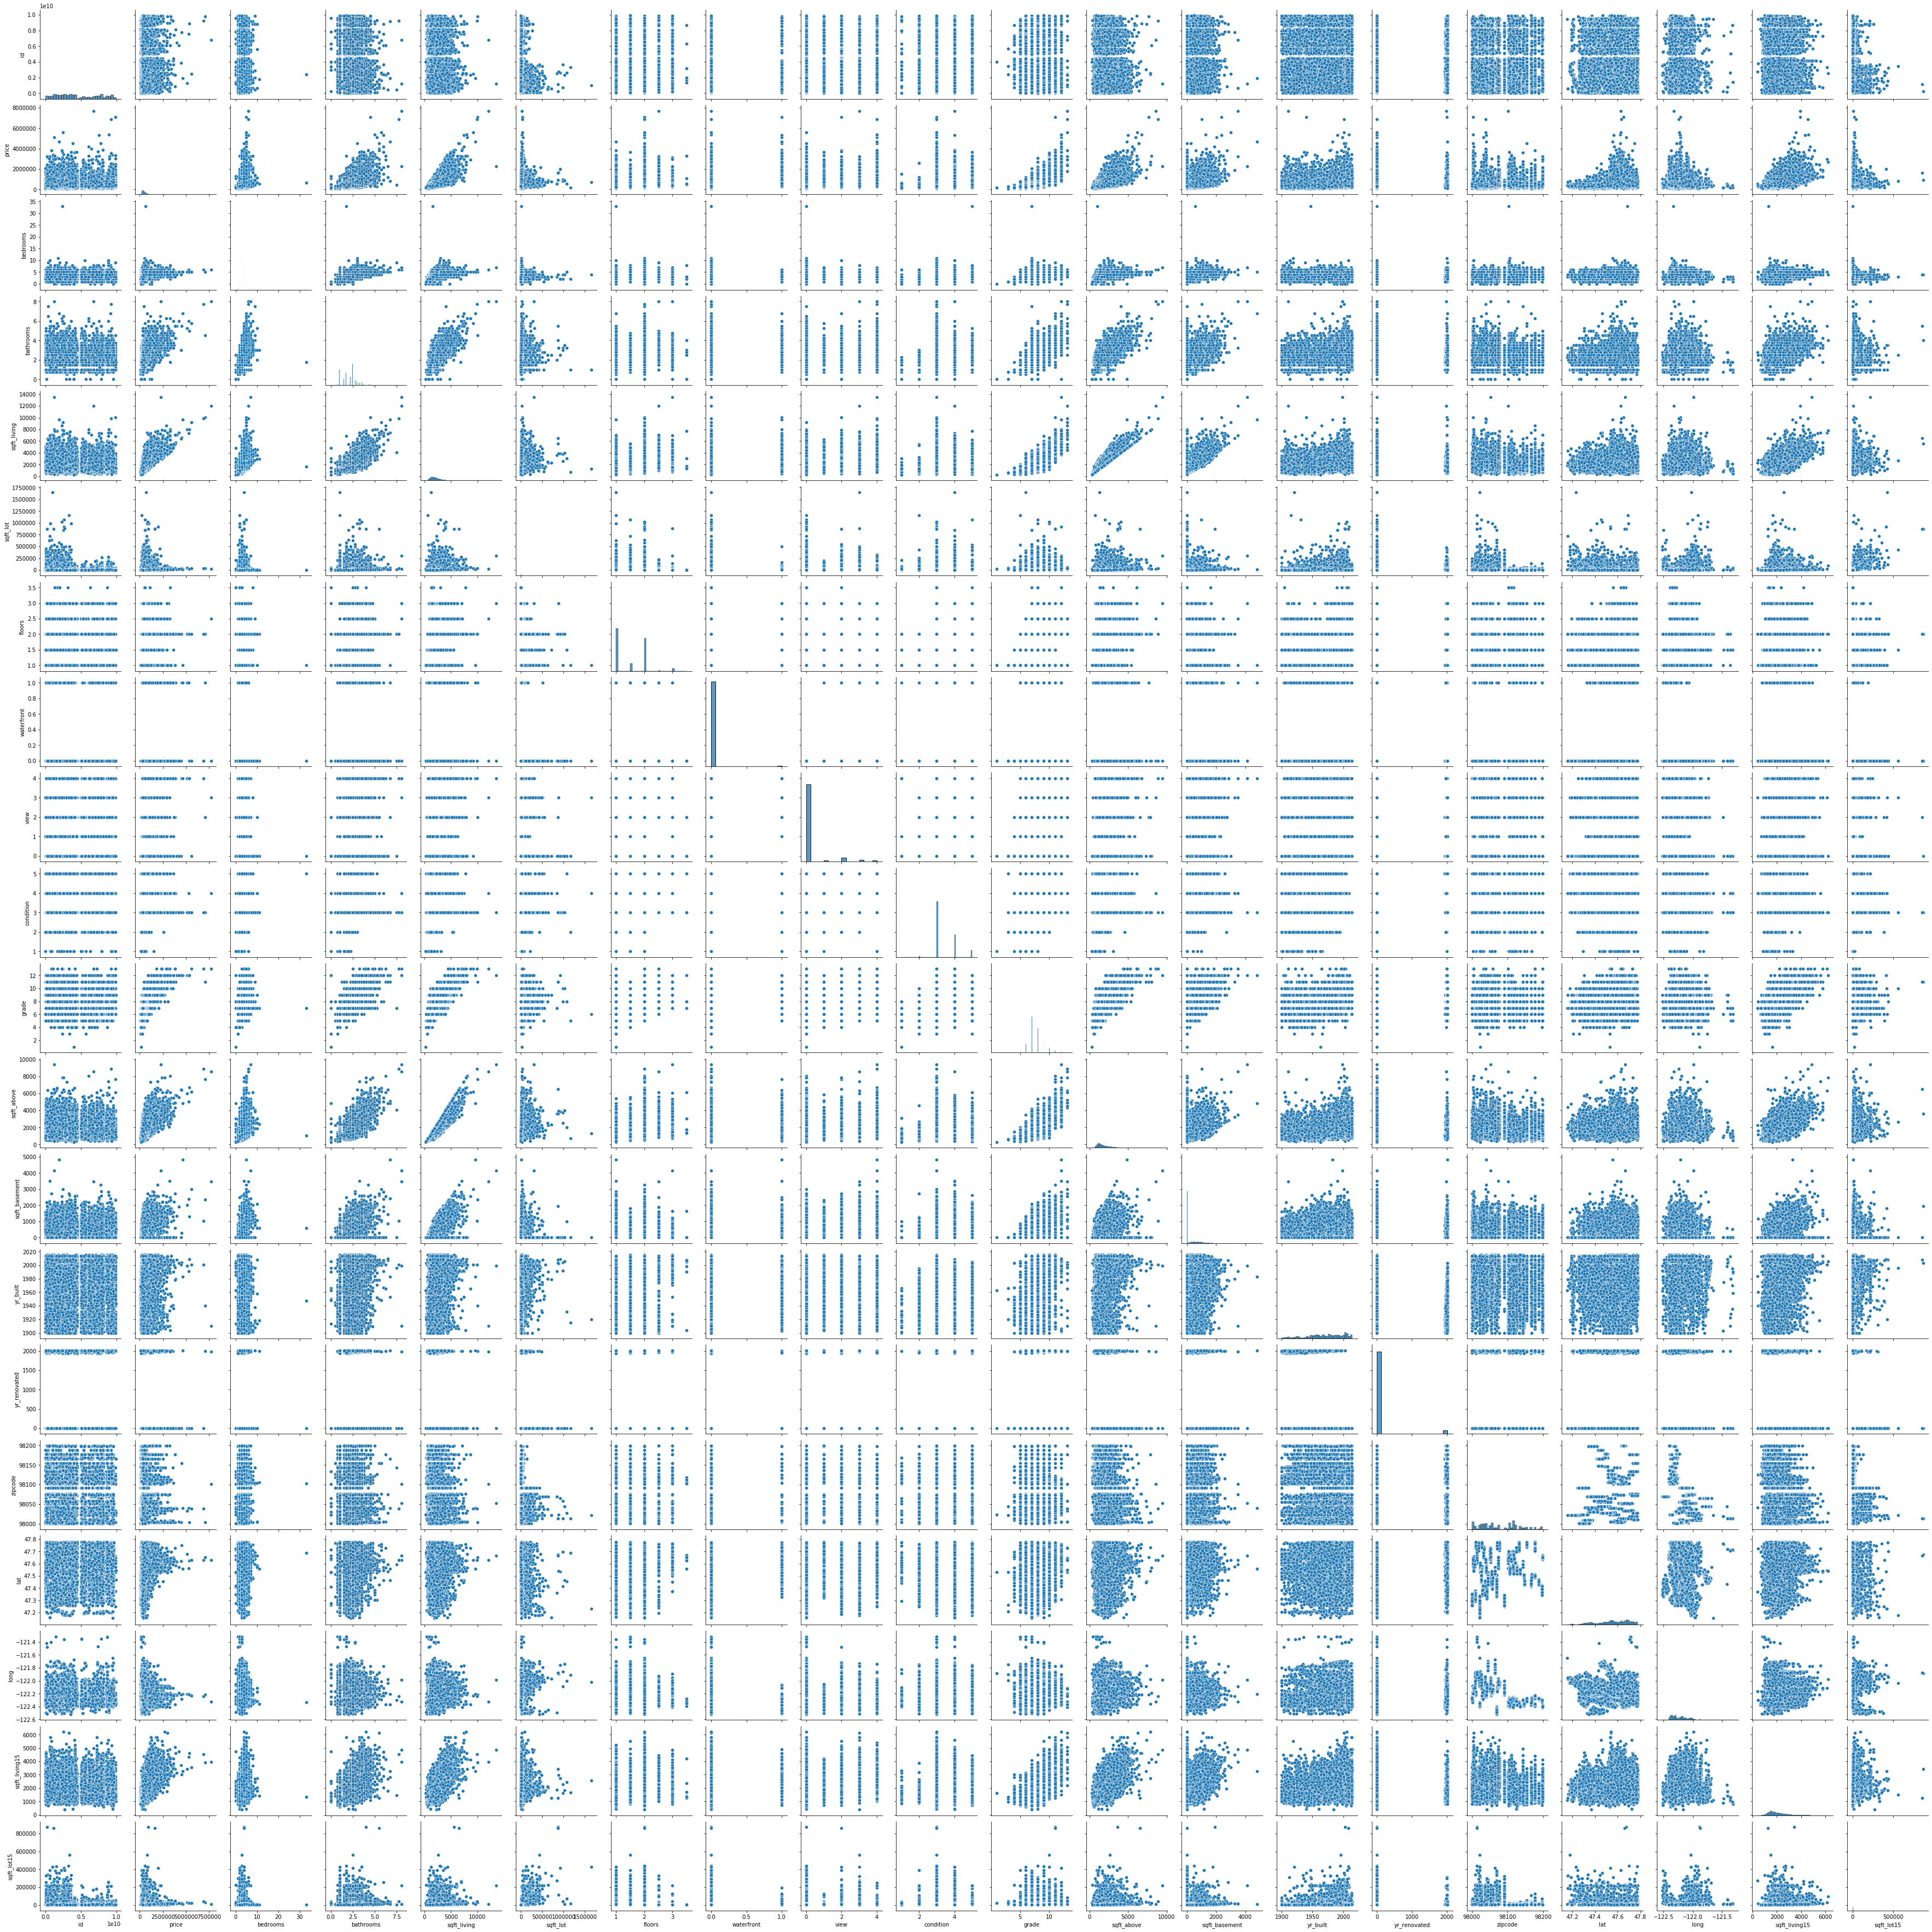

In [7]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BFCC171888>,
      dtype=object)

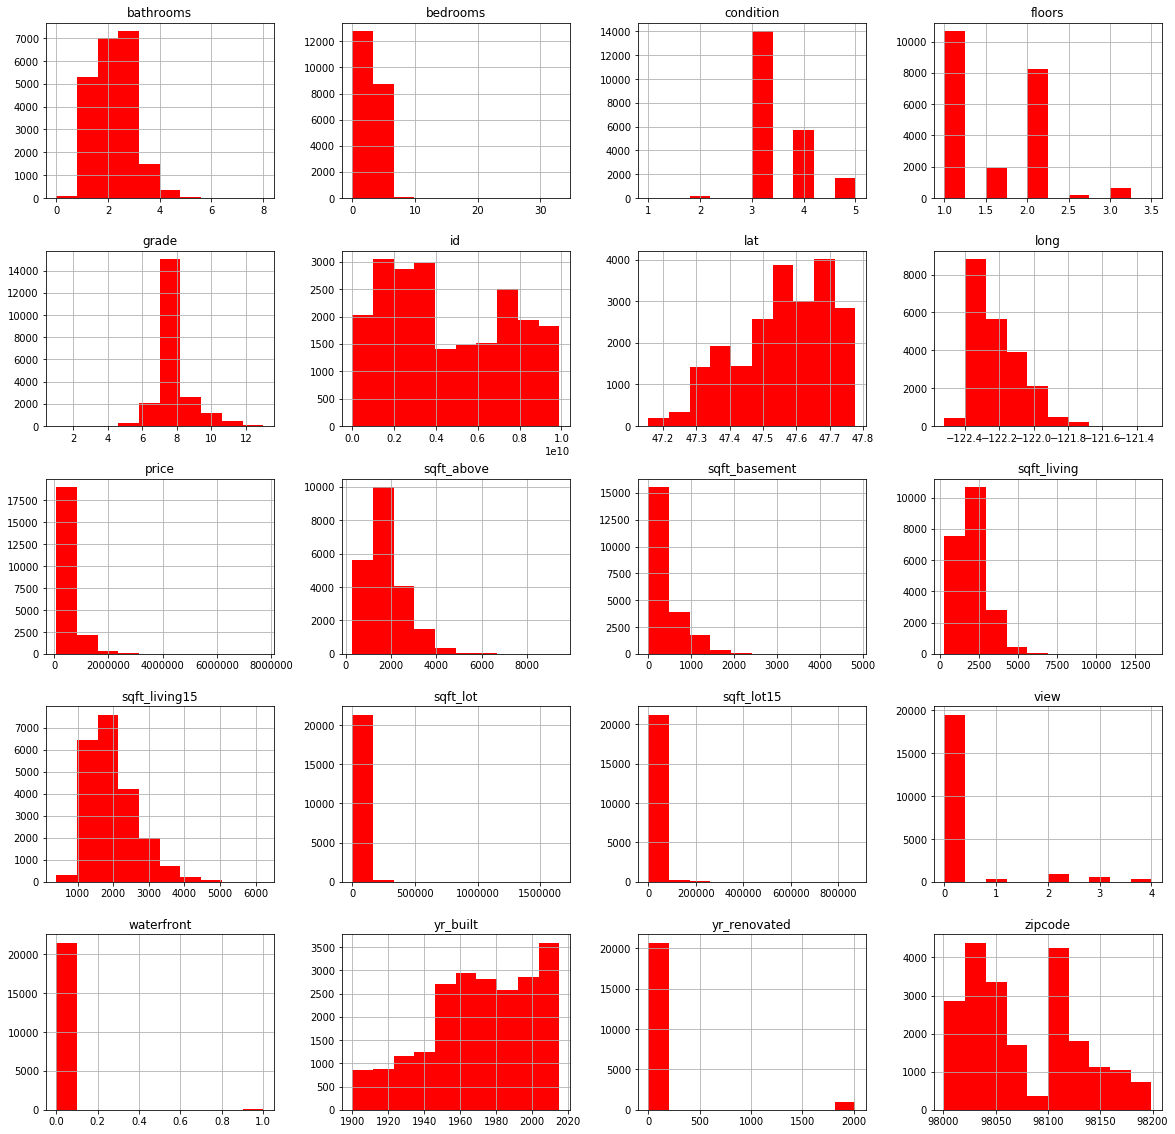

In [8]:
data.hist(figsize=(20,20),color='r')

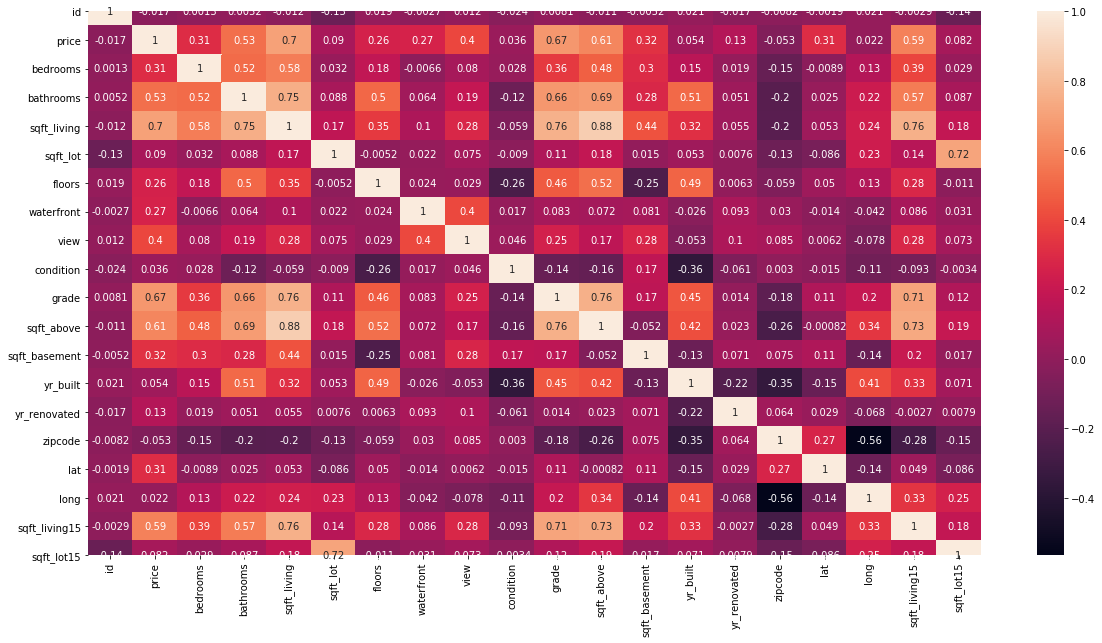

In [9]:
f,ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(),annot = True)

# Data Cleaning

In [10]:
data.shape

(21613, 21)

In [11]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [56]:
selected_features =['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [57]:
X = data[selected_features]

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 7 columns):
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


In [59]:
y = data['price']

In [60]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [61]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [66]:
X_scaled

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.915427  ,
        -0.73470764, -0.65868104],
       [-0.39873715,  0.1756067 ,  0.53363434, ...,  0.93650577,
         0.46084084,  0.2451414 ],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.915427  ,
        -1.22983377, -0.65868104],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ...,  0.93650577,
        -0.92792759, -0.65868104],
       [-0.39873715,  0.50022075, -0.52252773, ...,  0.93650577,
        -0.22750526, -0.65868104],
       [-1.47395936, -1.77207762, -1.15404732, ...,  0.93650577,
        -0.92792759, -0.65868104]])

In [70]:
y = y.reshape(-1,1)

In [71]:
y_scaled  = scaler.fit_transform(y)

In [72]:
y_scaled

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

# Training the Model

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [74]:
X_train.shape

(16209, 7)

In [75]:
X_test.shape

(5404, 7)

In [76]:
import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = 7, activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               800       
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [79]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 2s 5ms/step - loss: 0.4892 - val_loss: 0.4293
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.4438 - val_loss: 0.3981
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 0.3982 - val_loss: 0.4070
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 0.4458 - val_loss: 0.4010
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 0.3983 - val_loss: 0.4034
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.4205 - val_loss: 0.4079
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 0.3982 - val_loss: 0.3938
Epoch 8/100
260/260 [==============================] - 1s 4ms/step - loss: 0.3856 - val_loss: 0.3980
Epoch 9/100
260/260 [==============================] - 1s 4ms/step - loss: 0.3958 - val_loss: 0.3835
Epoch 10/100
260/260 [==============================] - 1s 4ms/step - loss: 0.3916 - val_lo

260/260 [==============================] - 1s 3ms/step - loss: 0.2610 - val_loss: 0.4850
Epoch 82/100
260/260 [==============================] - 1s 3ms/step - loss: 0.2388 - val_loss: 0.4518
Epoch 83/100
260/260 [==============================] - 1s 5ms/step - loss: 0.2558 - val_loss: 0.4654
Epoch 84/100
260/260 [==============================] - 1s 3ms/step - loss: 0.2421 - val_loss: 0.4571
Epoch 85/100
260/260 [==============================] - 1s 3ms/step - loss: 0.2542 - val_loss: 0.4914
Epoch 86/100
260/260 [==============================] - 1s 3ms/step - loss: 0.2468 - val_loss: 0.5011
Epoch 87/100
260/260 [==============================] - 1s 4ms/step - loss: 0.2435 - val_loss: 0.4691
Epoch 88/100
260/260 [==============================] - 1s 4ms/step - loss: 0.2420 - val_loss: 0.4895
Epoch 89/100
260/260 [==============================] - 1s 2ms/step - loss: 0.2719 - val_loss: 0.4723
Epoch 90/100
260/260 [==============================] - 1s 2ms/step - loss: 0.2427 - val_loss: 

In [80]:
y_train.shape

(16209, 1)

In [81]:
X_train.shape

(16209, 7)

# Evaluating the Model

In [83]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

C:\Users\bhara_5sejtsc\ML\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\Users\bhara_5sejtsc\ML\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\Users\bhara_5sejtsc\ML\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\Users\bhara_5sejtsc\ML\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used 

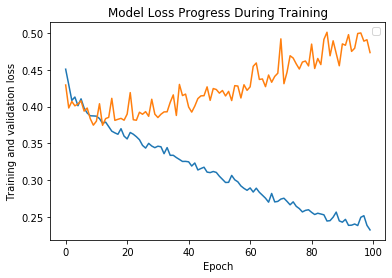

In [84]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Training and validation loss')
plt.title('Model Loss Progress During Training')
plt.legend('Training Loss', 'Validation Loss')

In [88]:
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])
scaler_1 = StandardScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)
y_predict_1 = model.predict(X_test_scaled_1)
y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

array([[407459.53]], dtype=float32)

Text(0, 0.5, 'True Values')

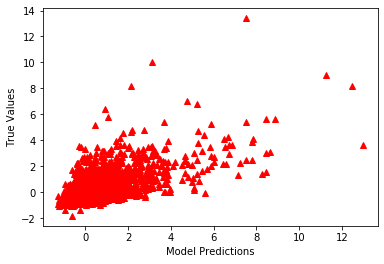

In [89]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [90]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

(0, 3000000)

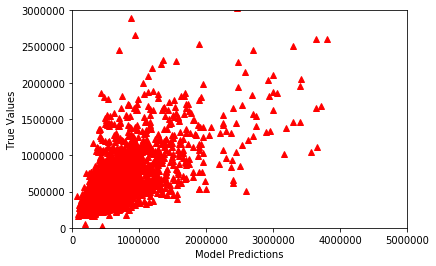

In [91]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [92]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [93]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 271547.067 
MSE = 73737809780.32631 
MAE = 162559.38904016413 
R2 = 0.5038393190617135 
Adjusted R2 = 0.5031956710323273


# Multiple Linear Regression

In [94]:
X

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0             3       1.00         1180      5650     1.0        1180   
1             3       2.25         2570      7242     2.0        2170   
2             2       1.00          770     10000     1.0         770   
3             4       3.00         1960      5000     1.0        1050   
4             3       2.00         1680      8080     1.0        1680   
...         ...        ...          ...       ...     ...         ...   
21608         3       2.50         1530      1131     3.0        1530   
21609         4       2.50         2310      5813     2.0        2310   
21610         2       0.75         1020      1350     2.0        1020   
21611         3       2.50         1600      2388     2.0        1600   
21612         2       0.75         1020      1076     2.0        1020   

       sqft_basement  
0                  0  
1                400  
2                  0  
3                910  
4                  0  
...              ...  
21608              0  
21609              0  
21610              0  
21611              0  
21612              0  

[21613 rows x 7 columns]

In [95]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [97]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)
print('Linear Model Coeff (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)

Linear Model Coeff (m) [[-5.89058353e+04  7.80020191e+03  2.14771294e+02 -2.86902222e-01
   1.11354237e+04  9.14285918e+01  1.23342702e+02]]
Linear Model Coeff (b) [64240.11286349]


In [98]:
y_predict = regressor.predict(X_test)

(0, 3000000)

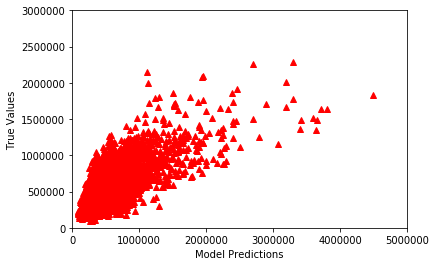

In [99]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [100]:
k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 245570.086 
MSE = 60304667367.40733 
MAE = 165724.03064391483 
R2 = 0.5189634606514515 
Adjusted R2 = 0.5183394325240533


# Let's Increase the number of variables

In [102]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = data[selected_features]

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [104]:
y = data['price']

In [105]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [106]:
import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_dim = 19, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [107]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [108]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0013 - val_loss: 6.3296e-04
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 6.4638e-04 - val_loss: 5.7758e-04
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 5.9533e-04 - val_loss: 5.5772e-04
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 5.2907e-04 - val_loss: 5.2342e-04
Epoch 5/100
260/260 [==============================] - 1s 4ms/step - loss: 5.0742e-04 - val_loss: 5.7889e-04
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 5.5164e-04 - val_loss: 5.1221e-04
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 4.5653e-04 - val_loss: 5.8464e-04
Epoch 8/100
260/260 [==============================] - 1s 2ms/step - loss: 4.2421e-04 - val_loss: 4.5809e-04
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 4.1657e-04 - val_loss: 4.5223e-04
Epoch 10/100
260/260 [=

260/260 [==============================] - 1s 4ms/step - loss: 1.8932e-04 - val_loss: 3.1300e-04
Epoch 76/100
260/260 [==============================] - 1s 5ms/step - loss: 2.1241e-04 - val_loss: 2.9033e-04
Epoch 77/100
260/260 [==============================] - 1s 4ms/step - loss: 2.3056e-04 - val_loss: 2.8956e-04
Epoch 78/100
260/260 [==============================] - 1s 3ms/step - loss: 2.1274e-04 - val_loss: 3.0495e-04
Epoch 79/100
260/260 [==============================] - 1s 3ms/step - loss: 2.0301e-04 - val_loss: 3.0287e-04
Epoch 80/100
260/260 [==============================] - 1s 3ms/step - loss: 2.0259e-04 - val_loss: 2.9170e-04
Epoch 81/100
260/260 [==============================] - 1s 2ms/step - loss: 1.9079e-04 - val_loss: 3.5365e-04
Epoch 82/100
260/260 [==============================] - 0s 2ms/step - loss: 2.0078e-04 - val_loss: 2.8772e-04
Epoch 83/100
260/260 [==============================] - 1s 2ms/step - loss: 2.1453e-04 - val_loss: 3.0409e-04
Epoch 84/100
260/260 [=

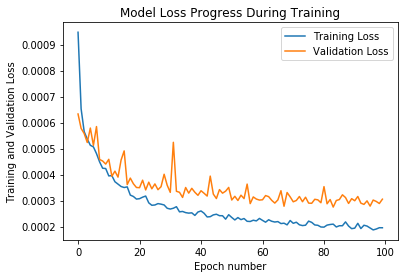

In [109]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

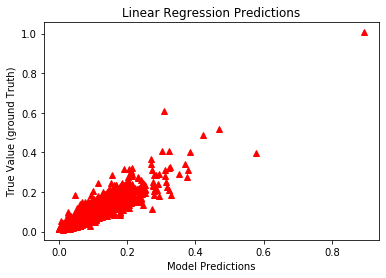

In [110]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [111]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


In [112]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 132415.458 
MSE = 17533853521.82278 
MAE = 78818.96989787657 
R2 = 0.8530607756648092 
Adjusted R2 = 0.852870157694026
